In [1]:
import numpy as np
import math
from math import pi
from math import cos, sin, tan
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# DH Matrix of Robot

## 3DOF Robot DH

In [2]:
dof_n = 3 #number of dof
pose_variables_n = 16 #number of pose variables, e.g. 2 => planar, 3=> 3d pose, 6=> 3d pose + orientation
def robot_fwd_kin(joints):
    #robot parameters
    #l1 = 0.25 #m
    #l3 = 0.15 #m
    #first row 
    dh11 = cos(joints[0])
    dh12 = 0
    dh13 = -1*sin(joints[0])
    dh14 = -1*sin(joints[0])*joints[2]

    #second row
    dh21 = sin(joints[0])
    dh22 = 0
    dh23 = cos(joints[0])
    dh24 = cos(joints[0])*joints[2]

    #3rd row
    dh31 = 0
    dh32 = -1
    dh33 = 0
    dh34 = joints[1]+joints[2]

    #4th row
    dh41 = 0
    dh42 = 0
    dh43 = 0
    dh44 = 1
    
    return np.array([[dh11, dh12, dh13, dh14],
                     [dh21, dh22, dh23, dh24],
                     [dh31, dh32, dh33, dh34],
                     [dh41, dh42, dh43, dh44]])



## 5 DOF Robot

In [9]:
dof_n = 5 #number of dof
pose_variables_n = 16 #number of pose variables, e.g. 2 => planar, 3=> 3d pose, 6=> 3d pose + orientation
def robot_fwd_kin(joints):
    th1 = joints[0]
    th2 = joints[1]  
    th3 = joints[2] 
    th4 = joints[3] 
    th5 = joints[4]
    #first row 
    dh11 = sin(pi/2 - th1)*sin(th5) + cos(th2 + th3 + pi/2 + th4)*cos(pi/2 - th1)*cos(th5)
    dh12 =  cos(th5)*sin(pi/2 - th1) - cos(th2 + th3 + pi/2 + th4)*cos(pi/2 - th1)*sin(th5)
    dh13 = sin(th2 + th3 + pi/2 + th4)*cos(pi/2 - th1)
    dh14 =  cos(pi/2 - th1)*(124*sin(th2 + th3 + pi/2 + th4) + 81*cos(th2 + th3) + 80*cos(th2))
    
    #second row
    dh21 = cos(th2 + th3 + pi/2 + th4)*cos(th5)*sin(pi/2 - th1) - cos(pi/2 - th1)*sin(th5)
    dh22 = - cos(pi/2 - th1)*cos(th5) - cos(th2 + th3 + pi/2 + th4)*sin(pi/2 - th1)*sin(th5)
    dh23 = sin(th2 + th3 + pi/2 + th4)*sin(pi/2 - th1)
    dh24 = sin(pi/2 - th1)*(124*sin(th2 + th3 + pi/2 + th4) + 81*cos(th2 + th3) + 80*cos(th2))
    
    #third row
    dh31 = sin(th2 + th3 + pi/2 + th4)*cos(th5)
    dh32 =  -sin(th2 + th3 + pi/2 + th4)*sin(th5)
    dh33 =  -cos(th2 + th3 + pi/2 + th4)
    dh34 = 81*sin(th2 + th3) - 124*cos(th2 + th3 + pi/2 + th4) + 80*sin(th2) + 35
    
    #forth row
    dh41 = 0
    dh42 = 0
    dh43 = 0
    dh44 = 1
    
    return np.array([[dh11, dh12, dh13, dh14],
                     [dh21, dh22, dh23, dh24],
                     [dh31, dh32, dh33, dh34],
                     [dh41, dh42, dh43, dh44]])

# Data Generation Segment
This segment is used to generate the training and testing data then saving them in a pickle file, if the data is already generated and no edits are introduced, the user can skip this part


In [1]:
#user defined parameters
#data parameters
data_n = 5*(10**5) #size of vectors of data

#robot parametrs

d_max_range = 0.2 #m
d_min_range = 0   #m

theta_max_range = pi  #rad
theta_min_range = 0   #rad

#calculations
#joint variables
if(dof_n == 3) :
    joint1 = np.random.uniform(low=theta_min_range, high=theta_max_range, size=(data_n,))
    joint2 = np.random.uniform(low=d_min_range, high=d_max_range, size=(data_n,)) 
    joint3 = np.random.uniform(low=d_min_range, high=d_max_range, size=(data_n,))


    joints = np.array([joint1, joint2, joint3]).T
elif(dof_n == 5):
    joint1 = np.random.uniform(low=theta_min_range, high=theta_max_range, size=(data_n,))
    joint2 = np.random.uniform(low=theta_min_range, high=theta_max_range, size=(data_n,))
    joint3 = np.random.uniform(low=theta_min_range, high=theta_max_range, size=(data_n,))
    joint4 = np.random.uniform(low=theta_min_range, high=theta_max_range, size=(data_n,))
    joint5 = np.random.uniform(low=theta_min_range, high=theta_max_range, size=(data_n,))

    joints = np.array([joint1, joint2, joint3, joint4, joint5]).T

#pose calculation

p = np.empty((data_n,4,4))
for i in range(len(joints)):
    p_1 = robot_fwd_kin(joints[i])
    p[i] = p_1
    

p = p.reshape(-1,16)



#dumping the data, user must take care of sequence of dumping
with open('robot_set.pickle','wb') as f:
    pickle.dump([p, joints], f)
            #leave first 3 elements reserved, start your changes after them, there are the pose data, then the joints data

print('\ndata saved :)')

NameError: name 'pi' is not defined

# Data Loading Segment

In [11]:
#data retrieval
with open("robot_set.pickle","rb") as f:
	all_data = pickle.load(f)

pose_data, joints_data = all_data[0], all_data[1]

del all_data

data_n = pose_data.shape[0] #update the size of data sets

test_size = int(0.15*data_n)
validate_size = int(0.15*data_n)

test_pose = pose_data[data_n-test_size:]
test_joints = joints_data[data_n-test_size:]

pose_data = np.delete(pose_data, list(range(data_n-test_size , pose_data.shape[0])), axis=0)
joints_data = np.delete(joints_data, list(range(data_n-test_size , joints_data.shape[0])), axis=0)

data_n = pose_data.shape[0] #update the size of data sets
validate_pose = pose_data[data_n-validate_size:]
validate_joints = joints_data[data_n-validate_size:]


pose_data = np.delete(pose_data, list(range(data_n-validate_size , pose_data.shape[0])), axis=0)
joints_data = np.delete(joints_data, list(range(data_n-validate_size , joints_data.shape[0])), axis=0)

# Trajectory Data

In [12]:
points_n_t = 20

if(dof_n == 3) :
    traj_joint = np.array([np.linspace(0,pi,points_n_t), np.linspace(0,0.2,points_n_t), np.linspace(0,0.2,points_n_t)]).T
elif(dof_n == 5):
    traj_joint = np.array([np.linspace(0,pi,points_n_t),np.linspace(0,pi,points_n_t),np.linspace(0,pi,points_n_t), np.linspace(0,0.2,points_n_t), np.linspace(0,0.2,points_n_t)]).T
    
p_t = np.empty((len(traj_joint),4,4))
for i in range(len(traj_joint)):
    p_1_t = robot_fwd_kin(traj_joint[i])
    p_t[i] = p_1_t
    
p_t_ip = p_t.reshape(-1,16)
px = p_t[:,0,3]
py = p_t[:,1,3]
pz = p_t[:,2,3]

# Neural Network Definition

In [16]:

n_nodes_hl1 = 64
n_nodes_hl2 = 64
n_nodes_hl3 = 64
n_nodes_hl4 = 64
n_nodes_hl5 = 64

#inpts and outputs
op_len = joints_data.shape[1]
ip_len = pose_data.shape[1]
x = tf.placeholder('float',shape=[None, ip_len ])
y = tf.placeholder('float')


def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([ip_len ,n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))
                      }

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1,n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))
                      }

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))
                      }

    hidden_4_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3,n_nodes_hl4])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl4]))
                      }
    
    hidden_5_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl4,n_nodes_hl5])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl5]))
                      }

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl5,op_len])),
                      'biases':tf.Variable(tf.random_normal([op_len]))
                     }

    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.sigmoid(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.sigmoid(l3)

    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.sigmoid(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.sigmoid(l5)
    
    output = tf.add(tf.matmul(l5,output_layer['weights']), output_layer['biases'])

    nodes = [hidden_1_layer, [hidden_2_layer], [hidden_3_layer],[hidden_4_layer],[output_layer]]

    return output,nodes	


# Training And Evaluation

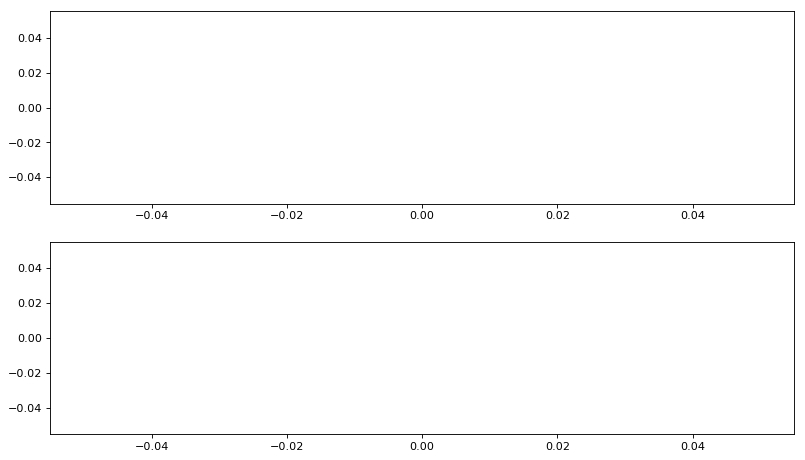

Epoch 0 completed out of 10000 loss: 9.12019538879
validation loss: 8.91022 validation accuracy 0.0
Epoch 1 completed out of 10000 loss: 8.94410991669
validation loss: 8.74092 validation accuracy 0.0
Epoch 2 completed out of 10000 loss: 8.76811695099
validation loss: 8.57203 validation accuracy 8e-06
Epoch 3 completed out of 10000 loss: 8.5922794342
validation loss: 8.40347 validation accuracy 2.66667e-06
Epoch 4 completed out of 10000 loss: 8.4167098999
validation loss: 8.23514 validation accuracy 2.66667e-06
Epoch 5 completed out of 10000 loss: 8.2415266037
validation loss: 8.06696 validation accuracy 5.33333e-06
Epoch 6 completed out of 10000 loss: 8.06682777405
validation loss: 7.89884 validation accuracy 8e-06
Epoch 7 completed out of 10000 loss: 7.89266252518
validation loss: 7.7307 validation accuracy 8e-06
Epoch 8 completed out of 10000 loss: 7.71872377396
validation loss: 7.56248 validation accuracy 5.33333e-06
Epoch 9 completed out of 10000 loss: 7.54461097717
validation loss

In [ ]:
def update_line(hl, new_data):
    hl.set_xdata(np.append(hl.get_xdata(), new_data[0]))
    hl.set_ydata(np.append(hl.get_ydata(), new_data[1]))
    plt.draw()

#stopping criteria
n_epochs = 10000  #number of feed forward and back prop
min_loss = 0.00334

#training parameters
batch_size = 2**7

alpha = 0.001  #learning rate, default 0.001

prediction,N = neural_network_model(x)
cost = tf.sqrt(tf.reduce_mean( tf.square(prediction-y) ))
optimizer = tf.train.AdamOptimizer(learning_rate=alpha).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.abs(prediction - y) < 0.008, tf.float32))
saver = tf.train.Saver()

plt.ion()
plt.figure(1,figsize=(12,7), dpi=80)
ax1 = plt.subplot(2,1,1)
ax1.set_xlim(auto=True)
ax1.set_ylim(auto=True)
h_trainingLoss, = plt.plot([],[])
ax2 = plt.subplot(2,1,2)
ax2.set_xlim(auto=True)
ax2.set_ylim(auto=True)
h_validLoss, = plt.plot([],[])
plt.show()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(n_epochs):
        epoch_loss = 0
        epoch_acc = 0
        for i in range(0, ip_len , batch_size):
            batch_x = pose_data[i:i+batch_size]
            batch_y = joints_data[i:i+batch_size]
            _,c = sess.run([ optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            epoch_loss += c
        update_line(h_trainingLoss, [epoch,epoch_loss]) 
        print('Epoch', epoch, 'completed out of',n_epochs,'loss:',epoch_loss)
        val_acc, val_loss = sess.run([accuracy, cost], feed_dict={x: validate_pose, y: validate_joints})
        update_line(h_validLoss, [epoch,val_loss]) 
        print('validation loss:',val_loss, 'validation accuracy', val_acc)
        if val_loss <= min_loss:
            break

    print('error :',sum(abs(prediction.eval({x:batch_x[0:1]})-batch_y[0:1])))

    print('\ntesting :')
    test_acc, test_loss = sess.run([accuracy, cost], feed_dict={x: test_pose, y: test_joints})
    print('test_loss:',test_loss, 'test accuracy', test_acc)
    
    result = prediction.eval({x: test_pose})
    actual = test_joints
    
    joints_pred = prediction.eval({x: p_t_ip})
    p_pred = np.empty((len(joints_pred),4,4))
    for i in range(len(joints_pred)):
        p_1_pred = robot_fwd_kin(joints_pred[i])
        p_pred[i] = p_1_pred
    
    px_pred = p_pred[:,0,3]
    py_pred = p_pred[:,1,3]
    pz_pred = p_pred[:,2,3]

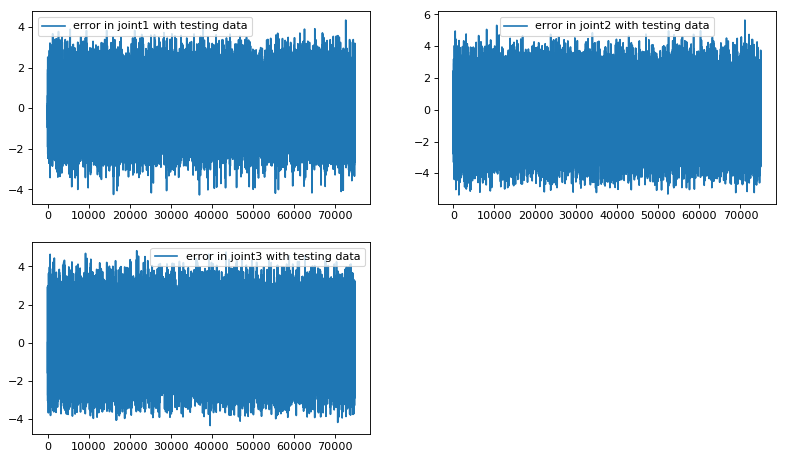

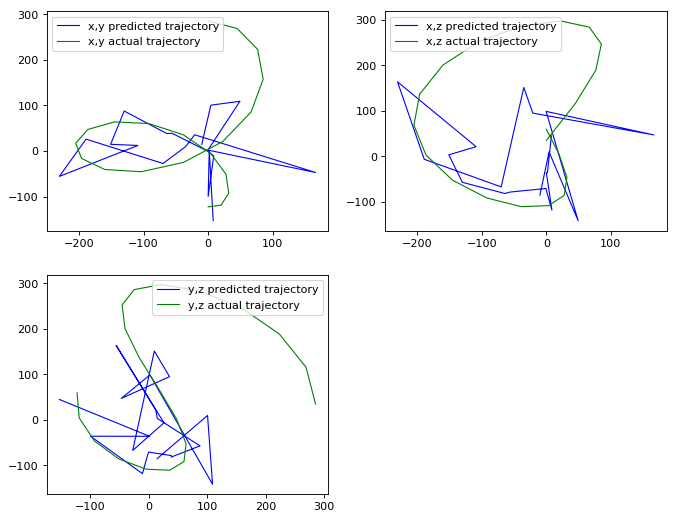

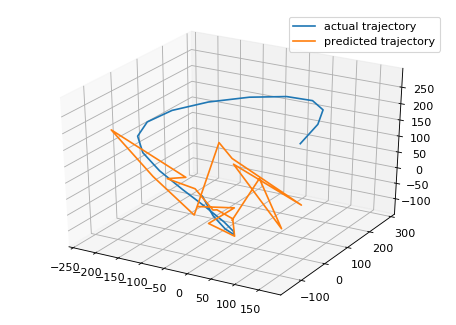

In [15]:
plt.figure(1,figsize=(12,7), dpi=80)
plt.subplot(2,2,1)
plt.plot(actual[:,0]-result[:,0], label='error in joint1 with testing data')
plt.legend()

plt.subplot(2,2,2)
plt.plot(actual[:,1]-result[:,1], label='error in joint2 with testing data')
plt.legend()

plt.subplot(2,2,3)
plt.plot(actual[:,2]-result[:,2], label='error in joint3 with testing data')
plt.legend()

plt.figure(2,figsize=(10,8), dpi=80)

plt.subplot(2,2,1)
plt.plot(px_pred, py_pred, color="blue", linewidth=1.0, linestyle="-", label='x,y predicted trajectory')
plt.plot(px, py, color="green", linewidth=1.0, linestyle="-", label='x,y actual trajectory')
plt.legend()

plt.subplot(2,2,2)
plt.plot(px_pred, pz_pred, color="blue", linewidth=1.0, linestyle="-", label='x,z predicted trajectory')
plt.plot(px, pz, color="green", linewidth=1.0, linestyle="-", label='x,z actual trajectory')
plt.legend()

plt.subplot(2,2,3)
plt.plot(py_pred, pz_pred, color="blue", linewidth=1.0, linestyle="-", label='y,z predicted trajectory')
plt.plot(py, pz, color="green", linewidth=1.0, linestyle="-", label='y,z actual trajectory')
plt.legend()

fig = plt.figure(figsize=(7,5), dpi=80)
ax = fig.gca(projection='3d')
ax.plot(px, py, pz, label='actual trajectory')
ax.plot(px_pred, py_pred, pz_pred, label='predicted trajectory')
ax.legend()

plt.show()

In [1]:

import random
N = 40
M = 100
a = [[random.random() for i in range(N)] for j in range(M)]


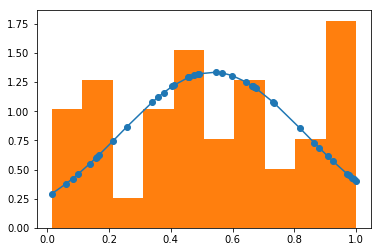

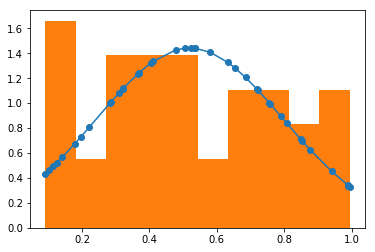

In [3]:
# now plot a dynamic graph

#first the imports 

import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import time

#initialise the graph and settings
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()


fig.canvas.draw()

#iterate - plot, erase
for i in range(0,M):
    #print i
    ax.clear() # - Clear
    h = sorted(a[i])
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))
    ax.plot(h,fit,'-o') # fit the line
    ax.hist(h,normed=True) # fit the histogram
    fig.canvas.draw()   # draw
    time.sleep(0.5)    #sleep